<h3>PROGRAMA DE CAPACITAÇÃO - Projeto final Turma E3 – Trilha de Data Science.</h3>
<h4>GRUPO 14 - 003-The Success of Bank Telemarketing</h4>
- Anna Letícia
- Johnny ACHILLE
- Zaiden EMILIANO

<h4>Neste projeto estamos seguindo o Processo Padrão Intersetorial para Mineração de Dados (CRISP-DM),que vem do inglês Cross Industry Standard Process for Data Mining, e que se consiste em 6 etapas.</h4>
<ul>
<li>Etapa 1: Entendimento do Negócio</li>
<li>Etapa 2: Entendimento dos dados</li>
<li>Etapa 3: Preparação dos dados</li>
<li>Etapa 4: Desenvolvimento do estudo ou análise</li>
<li>Etapa 5: Validação</li>
<li>Etapa 6: Implantação do projeto e acompanhamento</li>
</ul>

<h4>Entendimento do Negócio</h4>
<h4>Informações.</h4>
Uma instituição bancária portuguesa está realizando campanhas de marketing direto para promover seu produto de depósito a prazo. Essas campanhas são executadas principalmente por meio de chamadas telefônicas. Um dos desafios enfrentados pela equipe de marketing é a necessidade de realizar múltiplos contatos com o mesmo cliente para avaliar se ele subscreverá o produto. A tarefa é prever se um cliente irá subscrever ('sim') ou não ('não') o depósito a prazo, após a campanha de marketing.

<h4>Existem quatro conjuntos de dados:</h4>
<li>1) bank-additional-full.csv com todos os exemplos (41188) e 20 variáveis de entrada, ordenados por data (de maio de 2008 a novembro de 2010), muito próximo aos dados analisados em [Moro et al., 2014].</li>
<li>bank-additional.csv com 10% dos exemplos (4119), selecionados aleatoriamente do conjunto 1), e 20 variáveis de entrada.</li>
<li>bank-full.csv com todos os exemplos e 17 variáveis de entrada, ordenados por data (versão mais antiga deste conjunto de dados com menos variáveis de entrada).</li>
<li>bank.csv com 10% dos exemplos e 17 variáveis de entrada, selecionados aleatoriamente do conjunto 3 (versão mais antiga deste conjunto de dados com menos variáveis de entrada).</li>
Os conjuntos de dados menores são fornecidos para testar algoritmos de aprendizado de máquina mais exigentes computacionalmente (por exemplo, SVM).


Onde achar esta base: 
[UC Irvine ML Repository](https://archive.ics.uci.edu/ml/datasets/bank+marketing)


<h6>Importar bibliotecas python necessárias</h6>

In [1]:
#Importando as bibliotecas
import os
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

import seaborn as sns
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")


<h4>Importar Machine Learning models</h4>

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, classification_report

Lendo arquivo para verificar formatação.

In [2]:
nome_do_arquivo = 'bank-additional-full.csv'
arq = open(nome_do_arquivo,"r")
content = arq.readlines() 
print(content[0:5]) 

['"index,""age","job""""","marital""""","education""""","default""""","housing""""","loan""""","contact""""","month""""","day_of_week""""","duration""""","campaign""""","pdays""""","previous""""","poutcome""""","emp.var.rate""""","cons.price.idx""""","cons.conf.idx""""","euribor3m""""","nr.employed""""","y"""""""\n', '"0,""56","housemaid""""","married""""","basic.4y""""","no""""","no""""","no""""","telephone""""","may""""","mon""""",261,1,999,0,"nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"no""""\n', '"""\n', '"1,""57","services""""","married""""","high.school""""","unknown""""","no""""","no""""","telephone""""","may""""","mon""""",149,1,999,0,"nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"no""""\n', '"""\n']


Conforme a leitura do arquivo o mesmo será necessário alguns ajustes, antes de importa-lo. 


Realizando ajustes no arquivo para importação 

In [3]:
new_file = open("new_"+nome_do_arquivo, "w")

#loop para a leitura do arquivo
with open(nome_do_arquivo,"r") as file:
    for line in file:
        line = line.replace('"""""','"')#retirando 5x " e colocando uma "
        line = line.replace('""""','"')#retirando 4x " e colocando uma "
        if not (line.startswith('"""')): #não lendo linha com 3x "
            line = line.replace('"""','"')#retirando 3x " e colocando uma "
            line = line.replace(',""','","')#retirando ,"" e colocando uma ","
            new_file.write(line)
            #print (line)
new_file.close()


Após os ajustes foi criado um novo arquivo "new_bank-additional-full.csv"

Importando arquivo CSV com o Pandas

In [4]:
df = pd.read_csv('new_bank-additional-full.csv', delimiter = ',')
if df.empty:
    print ("Erro na importação do Data Frame!")
else:
    print ("Dados do Data Frame importados!")


Dados do Data Frame importados!


<h6>Análise exploratória de dados</h6>

Nesta seção, vamos explorar nosso conjunto de dados para obter insights. A análise exploratória de dados é uma etapa importante em qualquer projeto de Data Analytics ou Data Science. É o processo de investigar o conjunto de dados para descobrir padrões e anomalias (outliers) e formar hipóteses com base em nossa compreensão do conjunto de dados.

Vamos começar fazendo uma breve exploração dos dados.

In [5]:
df

,index,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,41183,73,retired,married,professional.course,no,yes,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,41185,56,retired,married,university.degree,no,yes,no,cellular,nov,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,41186,44,technician,married,professional.course,no,no,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#### Arquivo possui 41188 linhas e 22 colunas

In [6]:
#Verificar os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           41188 non-null  int64  
 1   age             41188 non-null  int64  
 2   job             41188 non-null  object 
 3   marital         41188 non-null  object 
 4   education       41188 non-null  object 
 5   default         41188 non-null  object 
 6   housing         41188 non-null  object 
 7   loan            41188 non-null  object 
 8   contact         41188 non-null  object 
 9   month           41188 non-null  object 
 10  day_of_week     41188 non-null  object 
 11  duration        41188 non-null  int64  
 12  campaign        41188 non-null  int64  
 13  pdays           41188 non-null  int64  
 14  previous        41188 non-null  int64  
 15  poutcome        41188 non-null  object 
 16  emp.var.rate    41188 non-null  float64
 17  cons.price.idx  41188 non-null 

In [7]:
#Verificar quantos valores unicos temos nas variaveis categóricas
{column: len(df[column].unique()) for column in df.select_dtypes('object').columns}

{'job': 12,
 'marital': 4,
 'education': 8,
 'default': 3,
 'housing': 3,
 'loan': 3,
 'contact': 2,
 'month': 10,
 'day_of_week': 5,
 'poutcome': 3,
 'y': 2}

>**Variáveis de entrada:**
>Dados do cliente: 
>* 0 - **index** (numérico) - Índice: Número do índice do cliente
>* 1 - **age** (numérico) - Idade: idade dos clientes 
>* 2 - **job** (categórico) - Profissão: tipo de trabalho (categórico: 12 valores distintos) 
>* 3 - **marital** (categórico) - Estado civil (categórico: 4 valores distintos) 
>* 4 - **education** (categórico) - Escolaridade: (categórica: 8 valores distintos)
>* 5 - **default** (categórico) - Inadimplência: tem crédito inadimplente? (Categórico: 'não', 'sim', 'desconhecido') 
>* 6 - **housing** (categórico) - Habitação: tem financiamento habitacional? (Categórico: 'não', 'sim', 'desconhecido')
>* 7 - **loan** (categórico) - Empréstimo: tem empréstimo pessoal? (Categórico: 'não', 'sim', 'desconhecido') 

>Dados do último contato da campanha atual: 
>* 8 - **contact** (categórico) - Contato: tipo de contato (categórico: 'celular', 'telefone') 
>* 9 - **month** (categórico) - Mês: último mês de contato (categórico: 10 valores distintos de Mar a Dez) 
>* 10 - **day_of_week** (categórico) - Dia da semana que foi realizado o contato (categórico: 5 valores distintos seg-sex) 
>* 11 - **duration** (numérico) - Duração: tempo de duração do último contato, em segundos. 

>Outros atributos: 
>* 12 - **campaign** (numérico) - Campanha: número de contatos realizados durante esta campanha, inclui último contato.
>* 13 – **pdays** (numérico) - P.dias: número de dias que se passaram após o último contato com o cliente de uma campanha anterior (numérico; 999 significa que o cliente não foi contatado anteriormente) 
>* 14 - **previous** (numérico) - Anterior: número de contatos realizados antes desta campanha para o cliente. 
>* 15 – **poutcome** (categórico) - Campanha passada: resultado da campanha de marketing anterior (categórica: 'fracasso', 'inexistente', 'sucesso', ‘outros’)

>Socioeconômico:
>* 16 - **emp.var.rate** (numérico) - Taxa de variação do emprego — indicador trimestral
>* 17 - **cons.price.idx** (numérico) - Índice de preços ao consumidor — indicador mensal
>* 18 - **cons.conf.idx** (numérico) - Índice de confiança do consumidor — indicador mensal
>* 19 - **euribor3m** (numérico) - Taxa de juros média dos empréstimos interbancários — indicador diário
>* 20 - **nr.employed** (numérico) - Número de empregados — indicador trimestral 


>**Variável de saída:** 
>* 21 - **y** (objeto) - Saida: Cliente aceitou o investimento? (categórica: 'sim', 'não')


In [8]:
#verificamos missing data
df.isnull().sum()

index             0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
#verificamos variavel duplicada
df.duplicated().sum()

0

In [10]:
#Binarizando os dados de saida.
df['y'] = df["y"].apply(lambda y: 1 if y == 'yes' else 0)
df

,index,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,41183,73,retired,married,professional.course,no,yes,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,41185,56,retired,married,university.degree,no,yes,no,cellular,nov,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,41186,44,technician,married,professional.course,no,no,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


<h4>Selecionar as variaveis de tipo objeto.</h4>

In [11]:
# seleciona as variaveis 
df.select_dtypes("object")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


<h4>Verificar dados nas variáveis categóricas</h4>

In [12]:
print('---Emprego---')
print(df["job"].value_counts())
print('\n---Estado Civil---')
print(df["marital"].value_counts())
print('\n---Educação---')
print(df["education"].value_counts())
print('\n---Inadimplência---')
print(df['default'].value_counts())
print('\n---Habitação---')
print(df["housing"].value_counts())
print('\n---Empréstimo---')
print(df["loan"].value_counts())
print('\n---Contato---')
print(df["contact"].value_counts())
print('\n---Mês---')
print(df["month"].value_counts())
print('\n---Dia da semana---')
print(df["day_of_week"].value_counts())
print('\n---Campanha passada---')
print(df['poutcome'].value_counts())
print('\n---Saida: CLIENTE ACEITOU?---')
print(df["y"].value_counts())

---Emprego---
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

---Estado Civil---
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

---Educação---
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

---Inadimplência---
no         32588
unknown     8597
yes            3
Name: default, dtype: int64

---Habitação---
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

---Empréstimo---
no         33950
yes         6248
unknown      990
Name: loan, dtype: int6

##### Análise variáveis categóricas:
1. **Emprego** - Verificamos que temos 330 clientes com emprego desconhecido 
2. **Estado Civil** - Verificamos que temos 80 clientes com Estado Civil desconhecido 
3. **Educação** - Verificamos que temos 1.731 clientes com educação desconhecida e 3 separações de graduação Básica, que podemos agrupá-las.
4. **Inadimplência** - Verificamos que temos 8.597 clientes com inadimplência desconhecida e somente 3 com Inadimplência.  
5. **Habitação** - Verificamos que temos 990 clientes com crédito de habitação desconhecida.
6. **Empréstimo** - Verificamos que temos 990 clientes com crédito de habitação desconhecida.
7. **Contato** - Não verificamos dados desconhecidos para o contato, e que a maioria dos contatos se dão pelo celular.
8. **Mês** - Foi verificado que a maioria dos contatos foram realizados no início da campanha em maio, caindo com o passar do tempo. 
9. **Dia da semana** - Contato na semana foram realizados de forma uniforme de segunda a sexta, sem muita variação. 
10. **Campanha passada** - Para a campanha passada teve sucesso em 1.373 e 35.563 clientes não participaram dela.
11. **Saída** - Verificamos que 4.640 clientes aderiram à campanha do banco.




In [13]:
#verificamos a quantidade dos cliente realizadou um depósito a prazo no banco apos ultimas campanha
df['poutcome'].value_counts(normalize=True)

nonexistent    0.863431
failure        0.103234
success        0.033335
Name: poutcome, dtype: float64

<h4>OBS:</h4>
Observamos que na última campanha 11.26% dos clientes realizou um depósito a prazo no banco após ultimas campanha.

In [14]:
#verificamos os clientes que tem credito no banco para financiamento habitacional.
pd.crosstab(df.housing, df.job, normalize='columns')

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
housing,,,,,,,,,,,,
no,0.444828,0.465096,0.440247,0.463208,0.466142,0.455814,0.451091,0.458050,0.435429,0.44194,0.424063,0.463636
unknown,0.021781,0.025935,0.024725,0.027358,0.024282,0.025581,0.028149,0.025447,0.026286,0.02180,0.026627,0.015152
yes,0.533391,0.508969,0.535027,0.509434,0.509576,0.518605,0.520760,0.516503,0.538286,0.53626,0.549310,0.521212


<h4>OBS:</h4>
Observamos que independente do emprego do cliente a contratação de crédito habitacional é superior a 50% em todas as categorias de emprego.

In [15]:
#Verificamos os clientes que tem empréstimo pessoal no banco
pd.crosstab(df.loan, df.job, normalize='columns')

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
loan,,,,,,,,,,,,
no,0.814143,0.826453,0.833791,0.827358,0.825581,0.834884,0.834624,0.823129,0.811429,0.831529,0.826430,0.812121
unknown,0.021781,0.025935,0.024725,0.027358,0.024282,0.025581,0.028149,0.025447,0.026286,0.021800,0.026627,0.015152
yes,0.164076,0.147612,0.141484,0.145283,0.150137,0.139535,0.137227,0.151424,0.162286,0.146671,0.146943,0.172727


<h4>OBS</h4>
Observamos que independente do emprego do cliente a contratação de crédito pessoal se mantem em média de 15% em todas as categorias de emprego.

#### Verificamos a distribuição das variáveis
Uma boa maneira de visualizar a distribuição de uma variável numérica é um histograma. Mas em que consistem? Os histogramas são uma forma de exibir a distribuição de um conjunto de dados, traçando o número ou porcentagem de observações cujos valores estão dentro de intervalos numéricos predefinidos e, em seguida, plotando esses números ou porcentagens em um gráfico de barras. Ou seja, em um histograma, os dados são colocados em intervalos e a altura das barras representa o número de casos que caem em cada intervalo. Em outras palavras, um histograma fornece uma visão da densidade de dados.


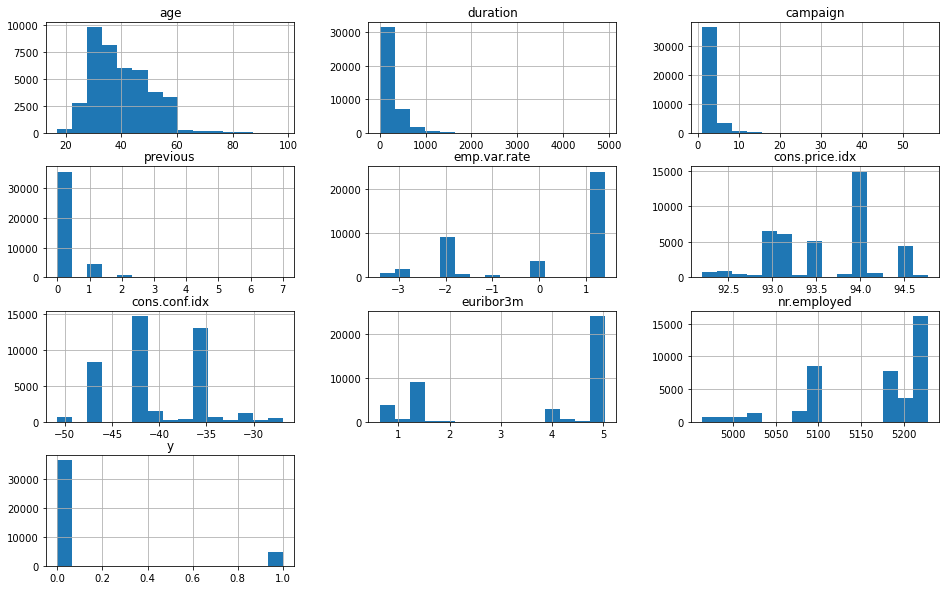

In [16]:
# plotar o histograma das variáveis numéricas
df_histograma = df.drop("index", axis=1) # retira o index
df_histograma['pdays'] = df_histograma['pdays'].replace([999], '-1') #substitui o 999 por -1
df_histograma.hist(bins = 15, figsize=(16,10));

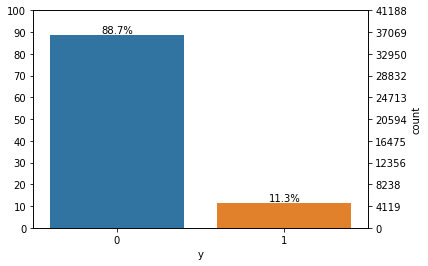

In [17]:
# Vamos verificar como as nossas variaveis de comporta com a nossa variavel alvo.

# Dados da variavel de Saida
Y = df["y"]
total = len(Y)*1.
ax=sns.countplot(x="y", data=df)

#Configurações para o matplotlib
# Make twin axis
ax2=ax.twinx()
# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()
# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
#ax2.set_ylabel('[%]')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/total), (x.mean(), y), ha='center', va='bottom') # set the alignment of the text
# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))
# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,total)
# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

plt.show()


<h4>OBS</h4>
Do total de 41.188 cliente 88,7% não aceitaram a oferta do banco.

In [18]:
def plot_com_saida(label, dataset):
    plt.figure(figsize=(20,10))
    Y = df[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=dataset, hue="y")
    #Configurações para o matplotlib
    # Make twin axis
    ax2=ax.twinx()
    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    #ax2.set_ylabel('[%]')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/total), (x.mean(), y), ha='center', va='bottom') # set the alignment of the text
    # Use a LinearLocator to ensure the correct number of ticks
    ax.yaxis.set_major_locator(ticker.LinearLocator(11))
    # Fix the frequency range to 0-100
    ax2.set_ylim(0,100)
    ax.set_ylim(0,total)
    # And use a MultipleLocator to ensure a tick spacing of 10
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

    plt.show()

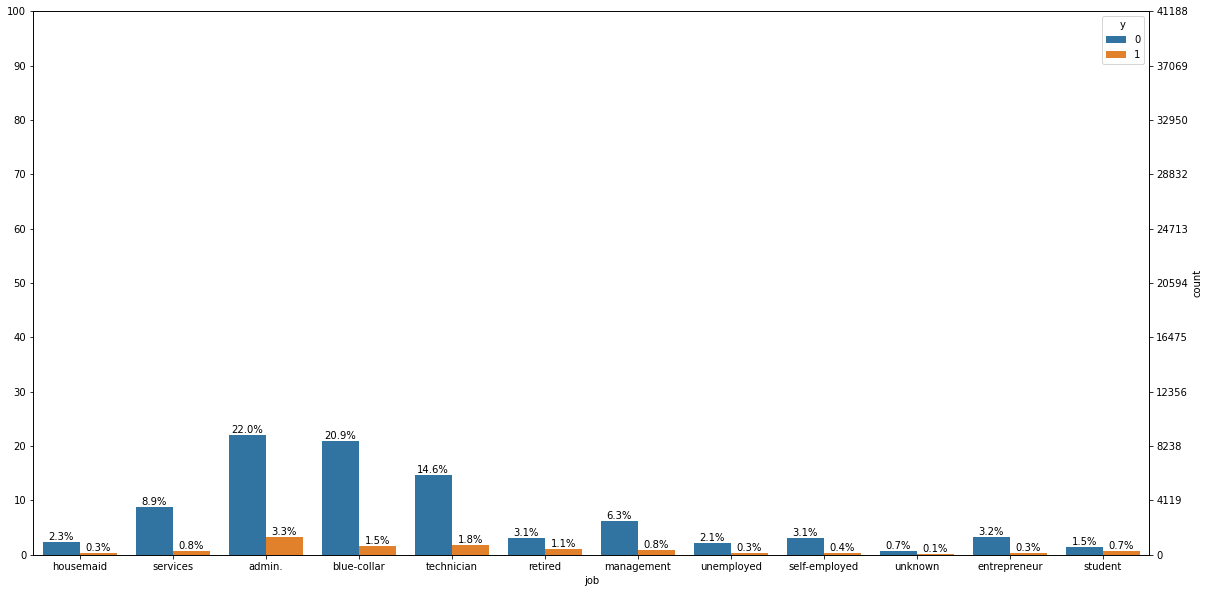

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
0,0.870274,0.931057,0.914835,0.9,0.887825,0.747674,0.895144,0.918619,0.685714,0.89174,0.857988,0.887879
1,0.129726,0.068943,0.085165,0.1,0.112175,0.252326,0.104856,0.081381,0.314286,0.10826,0.142012,0.112121


In [19]:
plot_com_saida("job", df)
pd.crosstab(df.y, df.job, normalize='columns')

<h4>OBS:</h4>
Observamos que do total de clientes contatados os que mais aceitaram a oferta foram os admin com 3,3%, blue-collar com 1,5% e technician com 1,8%. 
Se olharmos por ocupação do cliente temos que 31.42% dos clientes com emprego estudante aceitou a oferta e 25.23% dos clientes que estão aposentados também aceitaram a oferta, são dois grupos com alto índice de aceitação.

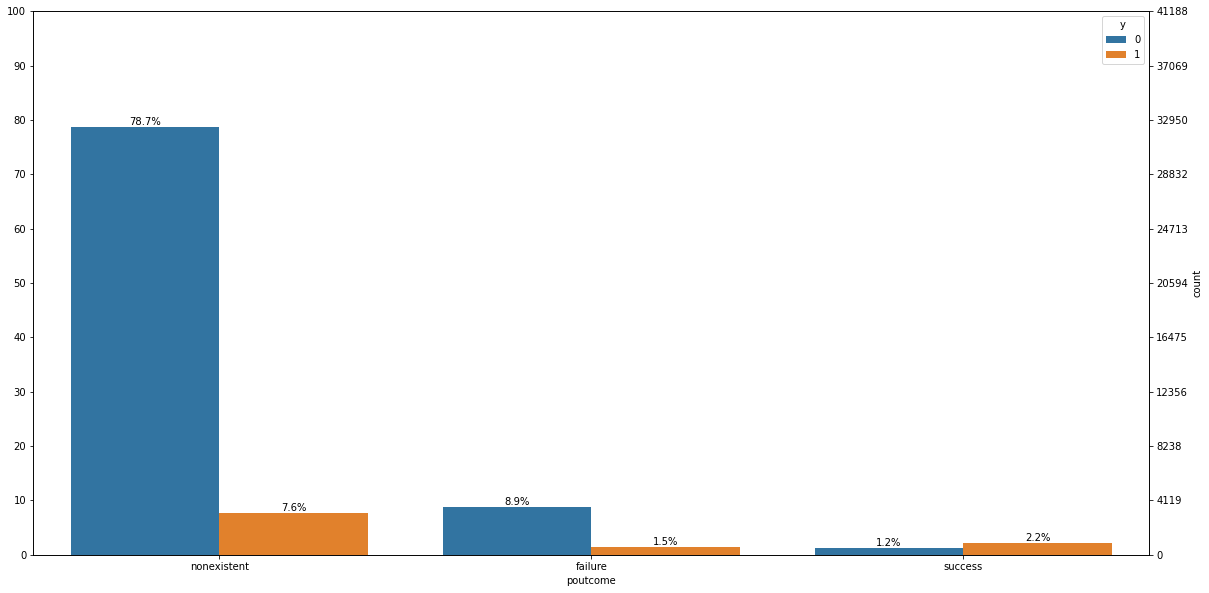

poutcome,failure,nonexistent,success
y,,,
0,0.857714,0.911678,0.348871
1,0.142286,0.088322,0.651129


In [20]:
plot_com_saida("poutcome", df)
pd.crosstab(df.y, df.poutcome, normalize='columns')

<h4>OBS:</h4>
Com relação à sucesso na última campanha, vemos que se o cliente já aceitou uma oferta no passado, existe uma tendência de 65,11% em aceitar uma nova oferta.

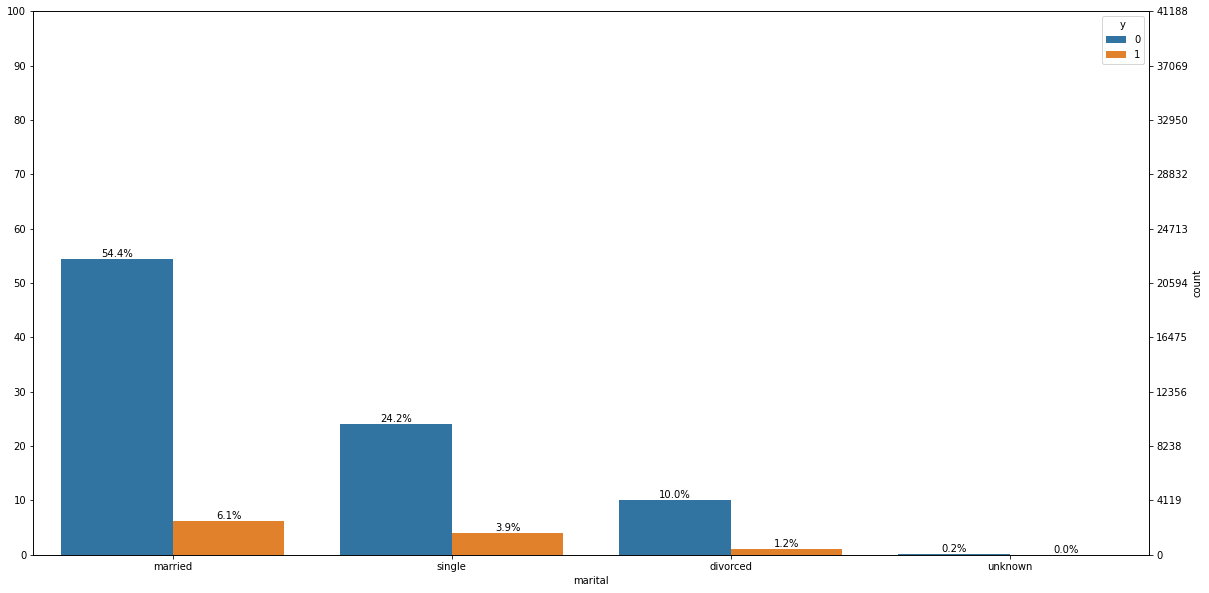

marital,divorced,married,single,unknown
y,,,,
0,0.896791,0.898427,0.859959,0.85
1,0.103209,0.101573,0.140041,0.15


In [21]:
plot_com_saida("marital", df)
pd.crosstab(df.y, df.marital, normalize='columns')

<h4>OBS:</h4>
Do total de clientes contatados, os casados são os que mais aceitaram a oferta, porem se olharmos por estado civil os solteiros aceitaram em 14% a oferta, contra 10% dos casados e divorciados. 

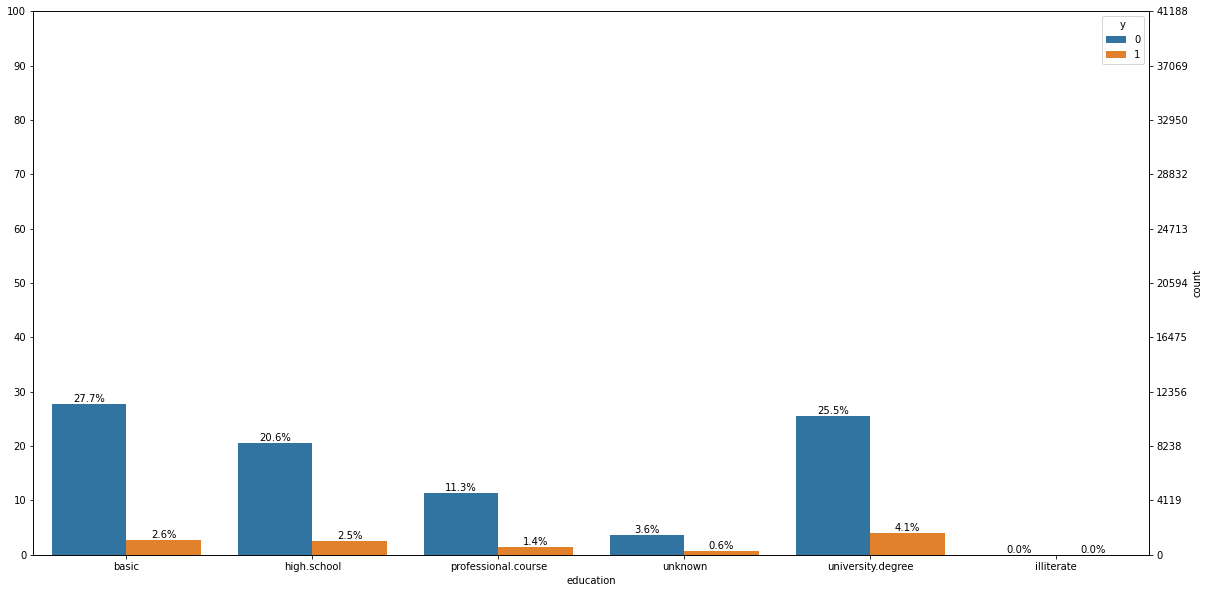

education,basic,high.school,illiterate,professional.course,university.degree,unknown
y,,,,,,
0,0.912971,0.891645,0.777778,0.886515,0.862755,0.854997
1,0.087029,0.108355,0.222222,0.113485,0.137245,0.145003


In [22]:
df['education'] = df['education'].replace(['basic.4y','basic.6y','basic.9y'], 'basic') #Agrupa a escolaridade Basic
plot_com_saida("education", df)
pd.crosstab(df.y, df.education, normalize='columns')

<h4>OBS:</h4>
Observamos que do total de clientes contatados os que mais aceitaram a oferta foram os que possuem uma graduação universitária com 4,1%, também se olharmos por escolaridade dos clientes os que possuem uma graduação universitária também são os que mais aceitaram.

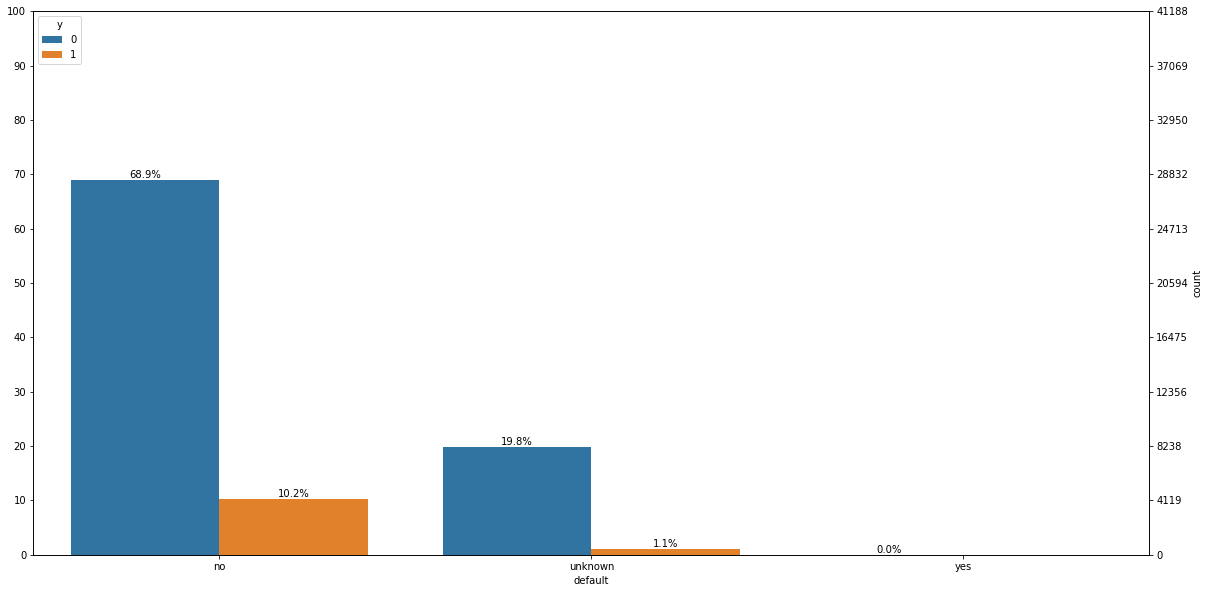

default,no,unknown,yes
y,,,
0,0.87121,0.94847,1.0
1,0.12879,0.05153,0.0


In [23]:
plot_com_saida("default", df)
pd.crosstab(df.y, df.default, normalize='columns')

<h4>OBS:</h4>
Observamos que a variável inadimplência por possuir registros desconhecidos e um pequeno grupo com 3 clientes marcados como sim, não afeta nossa variável alvo.   

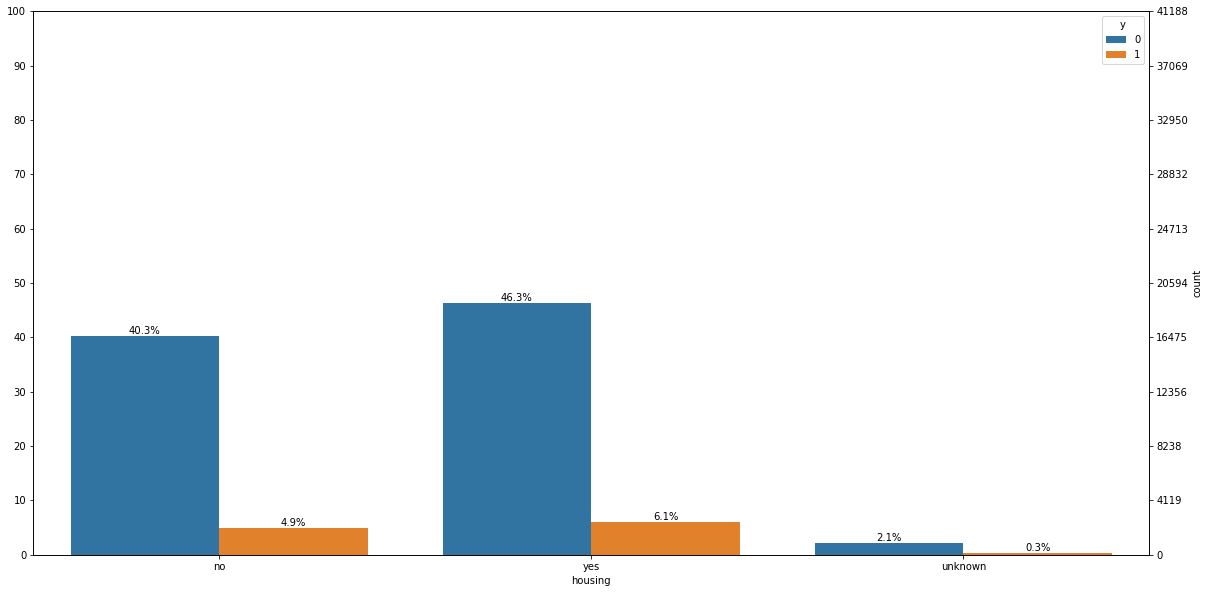

housing,no,unknown,yes
y,,,
0,0.891204,0.891919,0.883806
1,0.108796,0.108081,0.116194


In [24]:
plot_com_saida("housing", df)
pd.crosstab(df.y, df.housing, normalize='columns')

<h4>OBS:</h4>
Crédito habitacional está estável para a variável alvo, com 10% dos clientes aceitando a oferta independente de possuir crédito habitacional ou não.

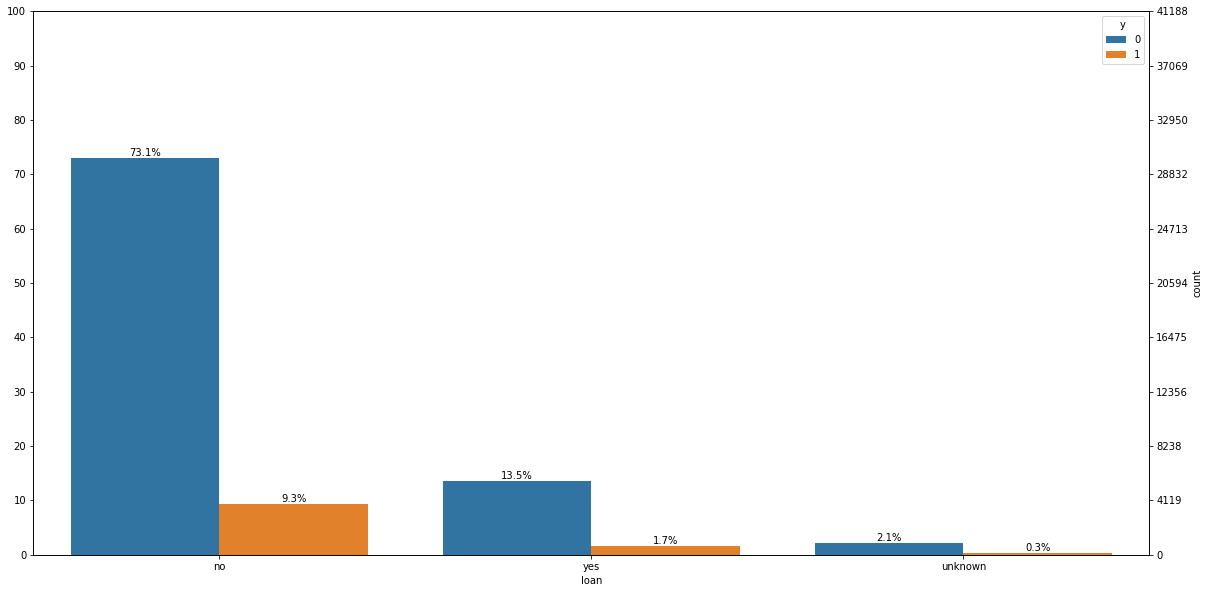

loan,no,unknown,yes
y,,,
0,0.886598,0.891919,0.890685
1,0.113402,0.108081,0.109315


In [25]:
plot_com_saida("loan", df)
pd.crosstab(df.y, df.loan, normalize='columns')

<h4>OBS:</h4>
Crédito pessoal está estável para a variável alvo, com 11% dos clientes aceitando a oferta independente de possuir crédito habitacional ou não, porem se olharmos para o total de clientes contatados 9,3% dos clientes que não tem empréstimo pessoal aceitaram a oferta.

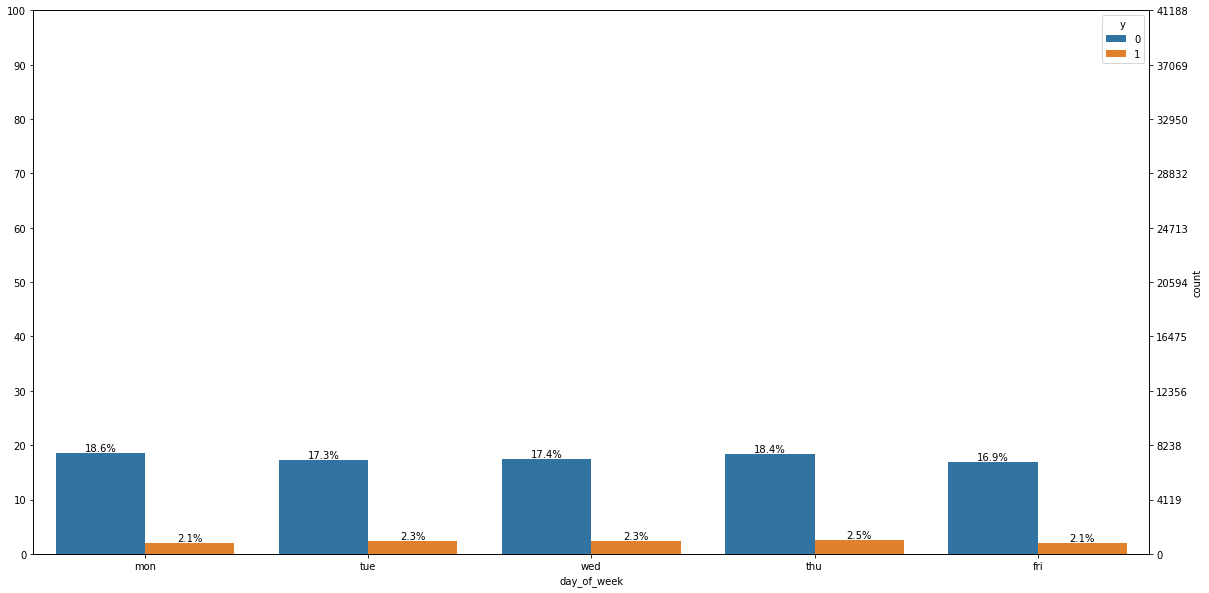

day_of_week,fri,mon,thu,tue,wed
y,,,,,
0,0.891913,0.900517,0.878812,0.8822,0.883329
1,0.108087,0.099483,0.121188,0.1178,0.116671


In [26]:
plot_com_saida("day_of_week", df)
pd.crosstab(df.y, df.day_of_week, normalize='columns')

<h4>OBS:</h4>
Contado nos dias da semana está estável para a variável alvo, com 2% dos clientes aceitando a oferta independente do dia da semana.

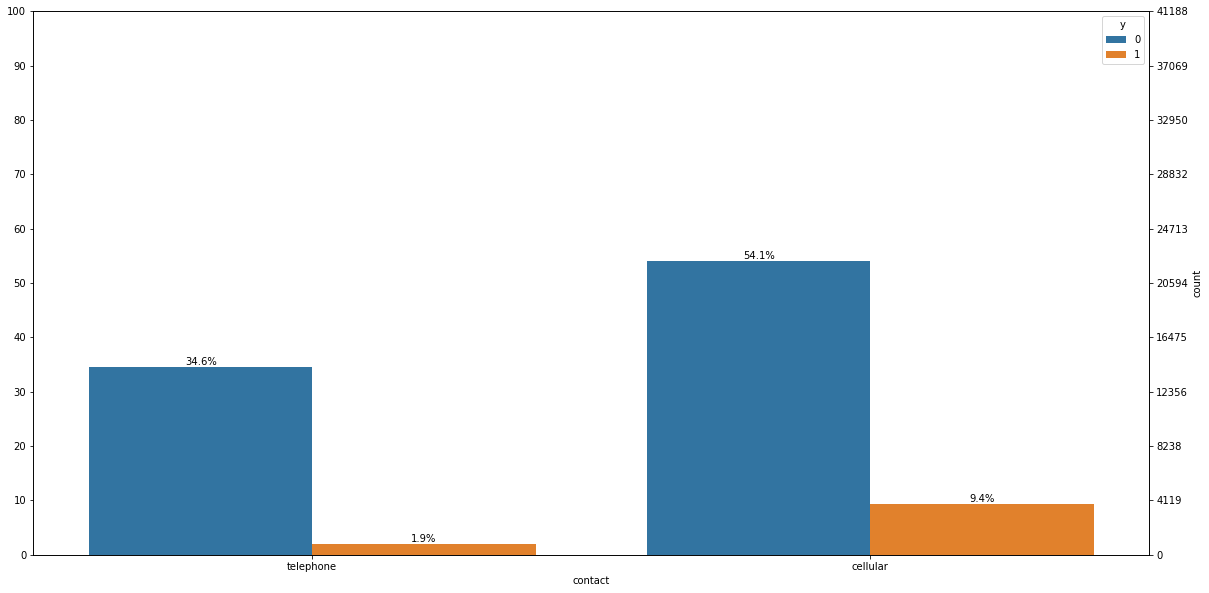

contact,cellular,telephone
y,,
0,0.852624,0.947687
1,0.147376,0.052313


In [27]:
plot_com_saida("contact", df)
pd.crosstab(df.y, df.contact, normalize='columns')

<h4>OBS:</h4>
Observado que o contato através do celular é mais efetivo, sendo que 14,73% dos clientes aceitaram a oferta por celular e somente 5% através do telefone fixo.

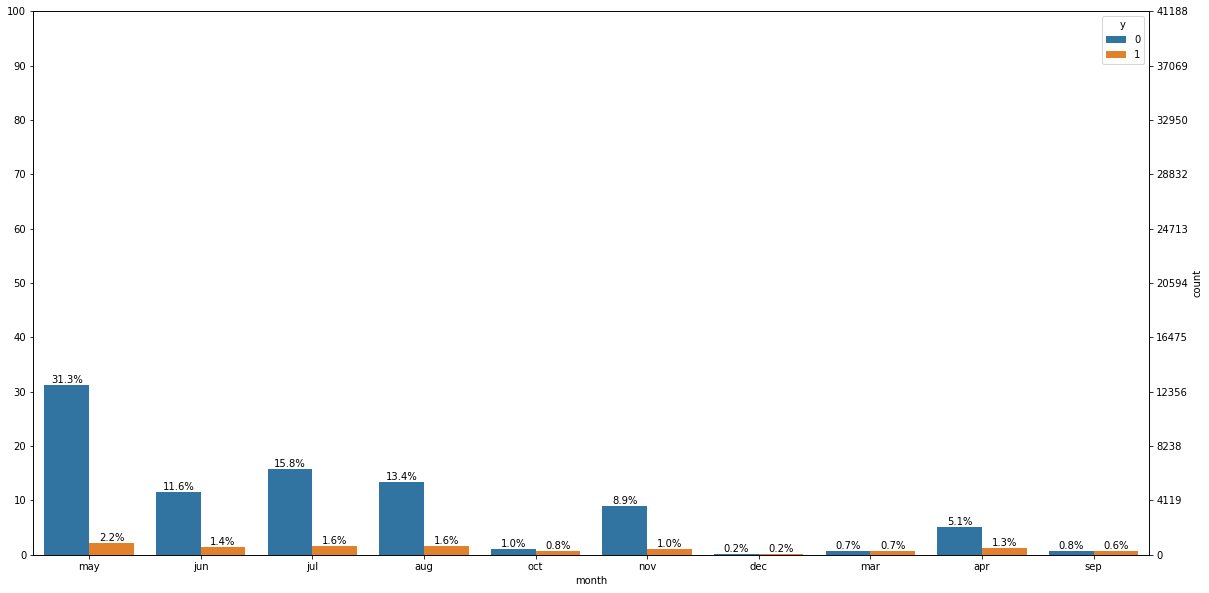

month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
y,,,,,,,,,,
0,0.795213,0.893979,0.510989,0.909534,0.894885,0.494505,0.935653,0.898561,0.561281,0.550877
1,0.204787,0.106021,0.489011,0.090466,0.105115,0.505495,0.064347,0.101439,0.438719,0.449123


In [28]:
plot_com_saida("month", df)
pd.crosstab(df.y, df.month, normalize='columns')

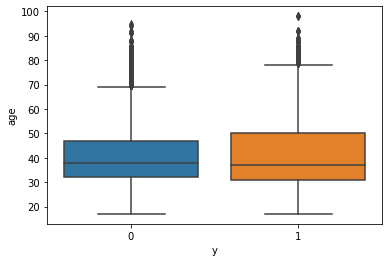

In [29]:
%matplotlib inline
sns.boxplot(data=df, x="y", y="age")
plt.show()

<h4>OBS:</h4>
Foi observado que a mediana da idade do cliente que aceita e rejeita a oferta é praticamente a mesma. 

In [30]:
## Vamos ajustar o Data Frame para Correlação de pearson
df = df.drop("index", axis=1) # retira o index
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


Text(0.5, 1.05, 'Correlação de Pearson')

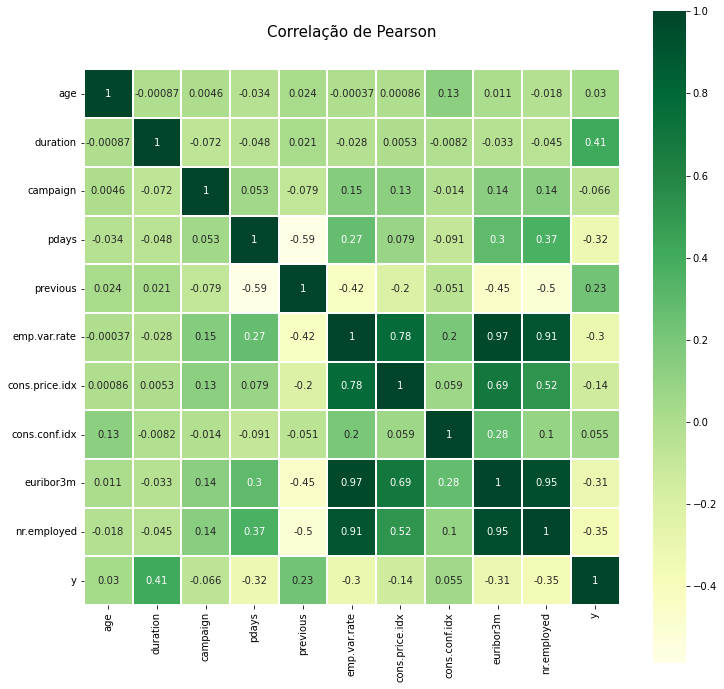

In [31]:
corr = df.corr()

f, ax = plt.subplots(figsize=(12,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)
plt.title("Correlação de Pearson", y=1.05, size=15)

In [32]:
#vamos ver como fica a correlação da variável de depósito a prazo com os variáveis independentes.
print(df.corr()['y'].sort_values())

nr.employed      -0.354678
pdays            -0.324914
euribor3m        -0.307771
emp.var.rate     -0.298334
cons.price.idx   -0.136211
campaign         -0.066357
age               0.030399
cons.conf.idx     0.054878
previous          0.230181
duration          0.405274
y                 1.000000
Name: y, dtype: float64


Tem algumas variáveis que tem relação positiva com a variável dependente (Y)

<h6>pré-processamento de dados</h6> é o processo de transformar dados brutos em um formato compreensível. Também é um passo importante na mineração de dados, pois não podemos trabalhar com dados brutos. A qualidade dos dados deve ser verificada antes de aplicar algoritmos de aprendizado de máquina ou mineração de dados.


##### Duration: Apesar dela ter uma correlação positiva, vamos descarta-la para treinar o modelo, pois é uma variável desconhecida antes de ligar para o cliente, o que faria o modelo ficar tendencioso e não teríamos como aplica-lo em produção.

In [33]:
df = df.drop("duration", axis=1) # retira o index
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


Separando as variáveis de entrada e saída

In [34]:
data_x = df.iloc[:, :-1]
print("Shape of X:", data_x.shape)
data_y = df["y"]
print("Shape of Y:", data_y.shape)

Shape of X: (41188, 19)
Shape of Y: (41188,)


Vamos separar em treino e teste 

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(data_x, data_y, test_size= 0.2)

print("X Train:", X_train.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y Test:", y_test.shape)

X Train: (32950, 19)
X Test: (8238, 19)
Y Train: (32950,)
Y Test: (8238,)


<h6>Categorização de variáveis</h6>
A categorização de variáveis contínuas é definida por Kerber (1992) como o processo de dividir os valores de uma variável em um pequeno número de intervalos, onde cada intervalo é formado por um símbolo discreto.

Abaixo vamos tratá-las

In [36]:
categorical_feature_mask = data_x.dtypes==object
categorical_cols = data_x.columns[categorical_feature_mask].tolist()

In [37]:
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

def add_onehot_to_dataframe(sparse, df, vectorizer, name):
  '''
      This function will add the one hot encoded to the dataframe.

  '''
  for i, col in enumerate(vectorizer.get_feature_names()):
    colname = name+"_"+col
    # df[colname] = pd.SparseSeries(sparse[:, i].toarray().flatten(), fill_value=0)
    df[colname] = sparse[:, i].toarray().ravel().tolist()
  
  return df

def OneHotEncoder(categorical_cols, X_train, X_test, X_cv=None, include_cv=False):
  '''
    This function takes categorical column names as inputs. The objective
    of this function is to take the column names iteratively and encode the 
    features using One hot Encoding mechanism and also adding the encoded feature
    to the respective dataframe.

    The include_cv parameter indicates whether we should include CV dataset or not.
    This is added specifically because when using GridSearchCV or RandomizedSearchCV,
    we only split the dataset into train and test to give more data to training purposes.
    This is done because GridSearchCV splits the data internally anyway.
  '''

  for i in categorical_cols:
    Vectorizer = CountVectorizer(token_pattern="[A-Za-z0-9-.]+")
    print("Encoding for feature: ", i)
    # Encoding training dataset 
    temp_cols = Vectorizer.fit_transform(X_train[i])
    X_train = add_onehot_to_dataframe(temp_cols, X_train, Vectorizer, i)

    # Encoding Cross validation dataset
    if include_cv:
      temp_cols = Vectorizer.transform(X_cv[i])
      X_cv = add_onehot_to_dataframe(temp_cols, X_cv, Vectorizer, i)

    # Encoding Test dataset
    temp_cols = Vectorizer.transform(X_test[i])
    X_test = add_onehot_to_dataframe(temp_cols, X_test, Vectorizer, i)


In [39]:
OneHotEncoder(categorical_cols, X_train, X_test)

# Drop the categorical features as the one hot encoded representation is present
X_train = X_train.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)

print("Shape of train: ", X_train.shape)
print("Shape of test: ", X_test.shape)

Encoding for feature:  job
Encoding for feature:  marital
Encoding for feature:  education
Encoding for feature:  default
Encoding for feature:  housing
Encoding for feature:  loan
Encoding for feature:  contact
Encoding for feature:  month
Encoding for feature:  day_of_week
Encoding for feature:  poutcome
Shape of train:  (32950, 60)
Shape of test:  (8238, 60)


In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32950 entries, 9467 to 39111
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            32950 non-null  int64  
 1   campaign                       32950 non-null  int64  
 2   pdays                          32950 non-null  int64  
 3   previous                       32950 non-null  int64  
 4   emp.var.rate                   32950 non-null  float64
 5   cons.price.idx                 32950 non-null  float64
 6   cons.conf.idx                  32950 non-null  float64
 7   euribor3m                      32950 non-null  float64
 8   nr.employed                    32950 non-null  float64
 9   job_admin.                     32950 non-null  int64  
 10  job_blue-collar                32950 non-null  int64  
 11  job_entrepreneur               32950 non-null  int64  
 12  job_housemaid                  32950 non-nu

Verificar dataset de treino e teste


In [41]:
print("Treino dataset: ", X_train.shape)
print("Teste dataset: ", X_test.shape)

Treino dataset:  (32950, 60)
Teste dataset:  (8238, 60)


<h4>Treinamento de Modelo:</h4>
<h4>LogisticRegression</h4>

Nesta seção, vamos ajustar, treinar e testar vários modelos de aprendizado de máquina para classificá-los e, em seguida, escolher algumas métricas para avaliá-los.

In [42]:
#Ajustando o medelo na base de treinamento
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

print("O score ROC AUC do modelo Regressão Logística é: ", roc_auc_score(y_test, y_pred[:,1]))


O score ROC AUC do modelo Regressão Logística é:  0.7676927921084717


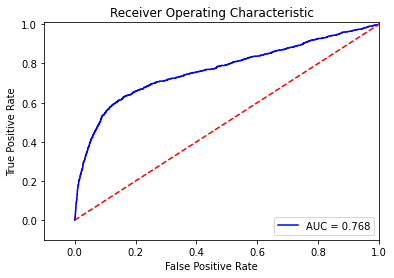

In [43]:
y_pred_sample_score = model.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h4>Hyperparameter tuning LogisticRegression</h4>
A otimização de hiperparâmetros é uma etapa essencial no desenvolvimento de modelos de machine learning. Ela permite melhorar a performance do modelo, aumentar a eficiência computacional, ajustar finamente as configurações do modelo, explorar diferentes abordagens e automatizar o processo de ajuste, resultando em soluções mais robustas e eficazes para problemas de dados complexos.

In [44]:
parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             verbose=5)

In [45]:
print("Melhor resultado: %f utilizando %s" % (clf.best_score_, clf.best_params_)) 

Melhor resultado: 0.900819 utilizando {'C': 2.0}


In [46]:
lr1 = LogisticRegression(C=1)
lr1.fit(X_train, y_train)
y_pre = lr1.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)
lr1.score(X_test,y_test)

0.8943918426802622

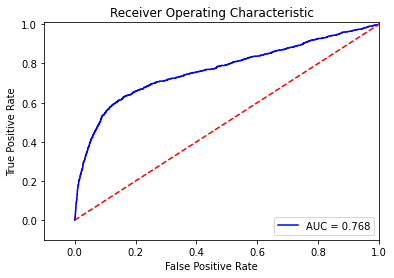

In [47]:
y_pred_sample_score = lr1.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [48]:
ypred_logistic= lr1.predict(X_test)
print(ypred_logistic)

[0 0 0 ... 0 0 0]


In [49]:
print(pd.crosstab(y_test,ypred_logistic, rownames=["actual"], colnames=["predicted"],margins=True))

predicted     0    1   All
actual                    
0          7198   84  7282
1           786  170   956
All        7984  254  8238


In [50]:
#get the valor of the classification metrics
logistic_perform= classification_report(y_test,ypred_logistic)
print(logistic_perform)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7282
           1       0.67      0.18      0.28       956

    accuracy                           0.89      8238
   macro avg       0.79      0.58      0.61      8238
weighted avg       0.87      0.89      0.87      8238



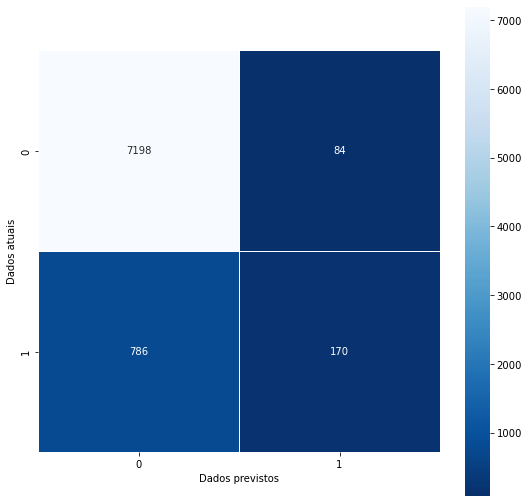

In [51]:
# plotting the confusion matrix
cm= confusion_matrix(y_test,ypred_logistic)
#print(sns.heatmap(cm, annot=True, cbar= False))

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Dados atuais');
plt.xlabel('Dados previstos');

A matriz de confusão:
- Previu não aceitação da oferta 7.194 vezes corretamente
- Previu aceitação da oferta 202 vezes corretamente
- Previu não aceitação da oferta 754 vezes incorretamente
- Previu aceitação da oferta 88 vezes incorretamente

<h6>Cálculo da probabilidade de um cliente responder</h6>
O método predict_proba()
No contexto de tarefas de classificação, alguns estimadores sklearn também implementam o método predict_proba que retorna as probabilidades de classe para cada ponto de dados.
O método aceita um único argumento que corresponde aos dados sobre os quais as probabilidades serão calculadas e retorna uma matriz de listas contendo as probabilidades de classe para os pontos de dados de entrada.

In [52]:
#predicting the probability for a customer will respond
logit_prob=clf.predict_proba(X_test)

In [53]:
df_prob=pd.DataFrame(logit_prob)
df_prob

,0,1
0,0.950909,0.049091
1,0.960066,0.039934
2,0.726980,0.273020
3,0.940615,0.059385
4,0.958674,0.041326
...,...,...
8233,0.881950,0.118050
8234,0.878686,0.121314
8235,0.954173,0.045827
8236,0.955519,0.044481


In [54]:
rfc  = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.feature_importances_

array([1.65425701e-01, 8.51840511e-02, 3.19916174e-02, 1.51574302e-02,
       2.47497483e-02, 2.35096750e-02, 2.59141105e-02, 1.15373874e-01,
       5.07999312e-02, 1.82555156e-02, 1.17243088e-02, 5.60050079e-03,
       4.16001630e-03, 9.00469690e-03, 7.37129704e-03, 6.24965973e-03,
       9.19697752e-03, 5.08734501e-03, 1.46881317e-02, 5.39627901e-03,
       2.24599467e-03, 1.10340457e-02, 1.71851909e-02, 1.51545990e-02,
       9.29703191e-04, 1.37058464e-02, 1.55918835e-02, 3.47977939e-04,
       1.17654376e-02, 1.58623056e-02, 6.73943526e-03, 7.95472329e-03,
       8.39428992e-03, 3.68034070e-08, 2.10734973e-02, 2.64045435e-03,
       2.01673944e-02, 1.42039745e-02, 2.58052031e-03, 1.41103734e-02,
       7.63559551e-03, 7.79379140e-03, 3.40184112e-03, 2.48429721e-03,
       8.34085201e-04, 2.91855257e-03, 3.24066265e-03, 4.94590286e-03,
       4.76160518e-03, 2.27948117e-03, 4.83040785e-03, 2.52316068e-03,
       1.40458716e-02, 1.47933448e-02, 1.47006814e-02, 1.48946295e-02,
      

Text(0.5, 1.0, 'Importância de cada feature')

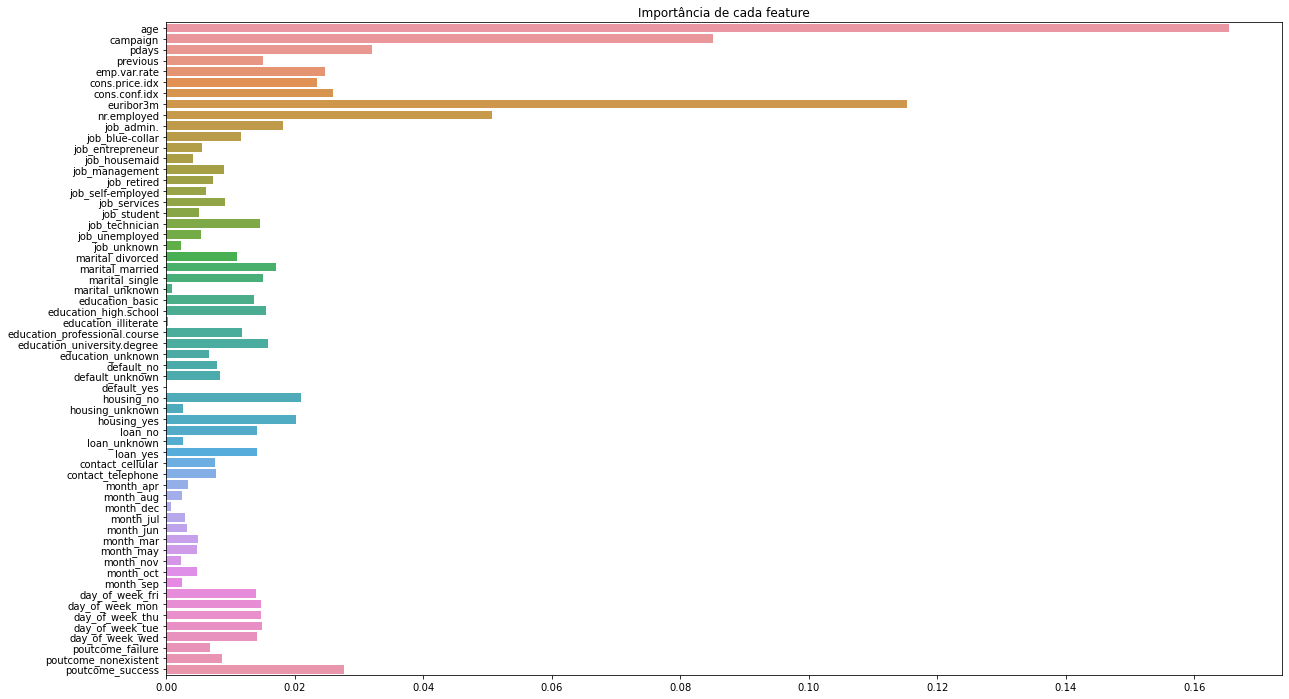

In [55]:
importances = pd.Series(data=rfc.feature_importances_, index=X_train.columns)
plt.figure(figsize=(20,12))
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')


#### Conclusão:
De acordo com a AUC da regressão logística o modelo tem uma chance de 77% de ser capaz de classificar o cliente corretamente.
Executando o RandomForestClassifier podemos dizer que as variáveis mais influentes são as socioeconômicas, a de idade e a quantidade de ligações realizadas, portanto se os bancos quiserem melhorar os resultados eles devem criar estratégias seguindo a importância das variáveis.